In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

/Users/gracelee/.pyenv/versions/3.5.4/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Python version :  3.5.4 (default, Sep 20 2018, 16:20:21) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
TensorFlow version :  1.5.0
Keras version :  2.2.2


Using TensorFlow backend.


In [7]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
# epochs = 12
epochs = 5

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              3137000   
__________

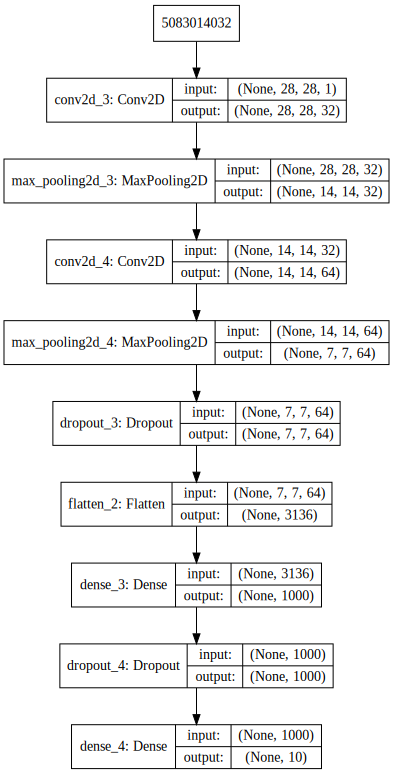

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 278s 5ms/step - loss: 0.1889 - acc: 0.9403 - val_loss: 0.0452 - val_acc: 0.9867
Epoch 2/5
60000/60000 [==============================] - 275s 5ms/step - loss: 0.0602 - acc: 0.9813 - val_loss: 0.0407 - val_acc: 0.9862
Epoch 3/5
60000/60000 [==============================] - 274s 5ms/step - loss: 0.0438 - acc: 0.9865 - val_loss: 0.0296 - val_acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 273s 5ms/step - loss: 0.0367 - acc: 0.9883 - val_loss: 0.0267 - val_acc: 0.9911
Epoch 5/5
60000/60000 [==============================] - 274s 5ms/step - loss: 0.0321 - acc: 0.9894 - val_loss: 0.0281 - val_acc: 0.9912


In [36]:
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 274s 5ms/step - loss: 0.0273 - acc: 0.9914 - val_loss: 0.0247 - val_acc: 0.9922
Epoch 2/5
60000/60000 [==============================] - 274s 5ms/step - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0237 - val_acc: 0.9929
Epoch 3/5
60000/60000 [==============================] - 273s 5ms/step - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0238 - val_acc: 0.9919
Epoch 4/5
60000/60000 [==============================] - 273s 5ms/step - loss: 0.0189 - acc: 0.9935 - val_loss: 0.0241 - val_acc: 0.9931
Epoch 5/5
60000/60000 [==============================] - 273s 5ms/step - loss: 0.0172 - acc: 0.9947 - val_loss: 0.0195 - val_acc: 0.9944


In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.01945643838075339
Test accuracy: 0.9944


In [38]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.027255514149243633, 0.021640333097955832, 0.02176636877891918, 0.01885105263412309, 0.017242827325562635]
[0.9914333333333334, 0.9931333333333333, 0.9929999999682109, 0.9934666666666667, 0.9947]


In [15]:
import random
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

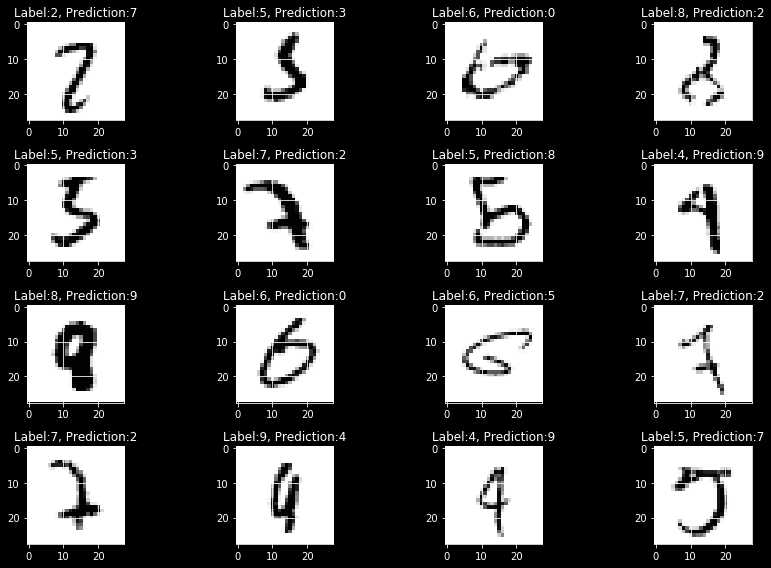

In [17]:
wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in wrong_result[:nrows*ncols]:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [18]:
len(wrong_result)

88

* https://pinkwink.kr/1121